In [1]:
import sys
print("Вы используете Python {}.{}".format(sys.version_info.major, sys.version_info.minor))

Вы используете Python 3.7


In [2]:
import os
import imageio
import numpy as np

In [3]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(imageio.imread(f))
            labels.append(int(d))
#     return np.array(images), np.array(labels)
    return images, labels

In [4]:
ROOT_PATH = "./"
train_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Training")
test_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Testing")

images, labels = load_data(train_data_directory)

Вывести размерность 'images'

In [5]:
print(np.array(images).ndim)

1


Вывести количество элементов в 'images'

In [6]:
print(np.array(images).size)

4575


Вывести первое значение 'images'

In [7]:
images[0]

Array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

Вывести размерность 'labels'

In [8]:
print(np.array(labels).ndim)

1


Вывести число элементов в 'labels'

In [9]:
print(np.array(labels).size)

4575


Вывести длину массива 'labels'

In [10]:
print(len(set(labels)))

62


### Распределение дорожных знаков по типам

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

Построить гистограмму с 64 точками - значениями 'labels'

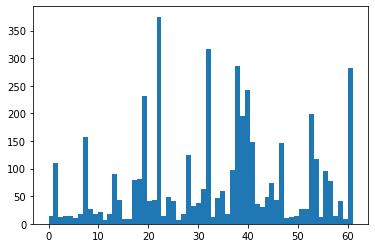

In [12]:
plt.hist(labels, 62)
plt.show()

Determine the (random) indexes of the images that you want to see 

In [13]:
traffic_signs = [300, 2250, 3650, 4000]

Fill out the subplots with the random images that you defined 

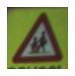

shape: (62, 61, 3), min: 3, max: 160


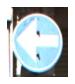

shape: (110, 96, 3), min: 3, max: 255


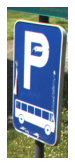

shape: (379, 153, 3), min: 0, max: 255


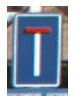

shape: (100, 68, 3), min: 17, max: 255


In [14]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))
plt.show()

## Выведем по одному изображению из каждого типа знаков:

Задание типов

In [15]:
unique_labels = set(labels)

Инициализация графика

In [16]:
plt.figure(figsize=(15, 15))

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

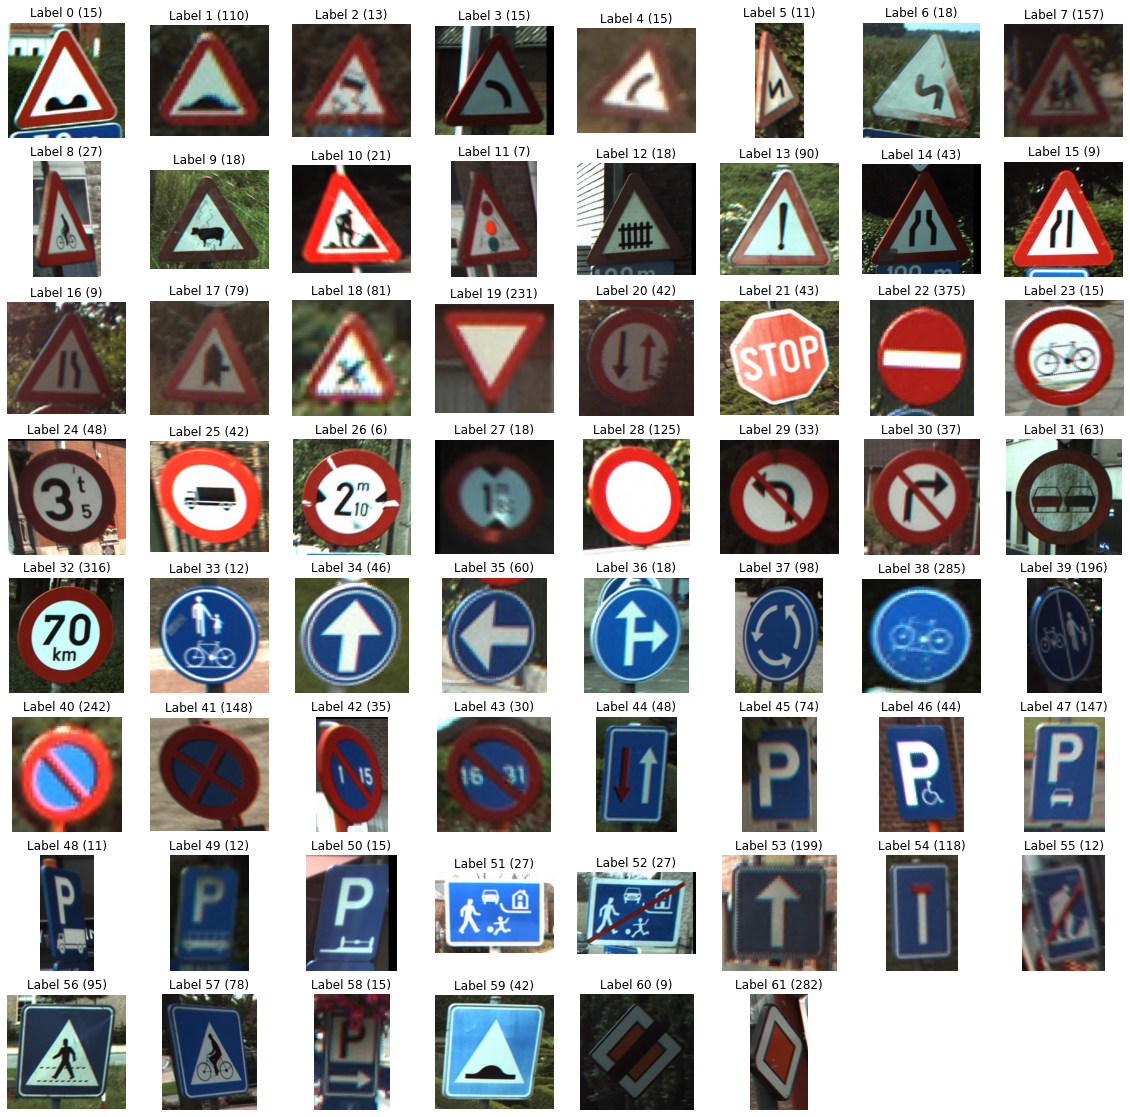

In [17]:
# Задание счетчика
i = 1

plt.figure(figsize=(20, 20))
for label in unique_labels:

    # Выбирается первое изображение каждого типа:
    image = images[labels.index(label)]

    # Задание 64 графиков
    plt.subplot(8, 8, i)

    # Выключение осей
    plt.axis('off')

    # Добавление заголовка каждому графику
    plt.title("Label {0} ({1})".format(label, labels.count(label)))

    # Увеличить значение счетчика на 1
    i += 1

    # Вывод первого изображения
    plt.imshow(image)

# Вывод всего графика

plt.show()

## Приведение изображений к одному размеру

In [18]:
# Импорт модуля 'transform' из 'skimage'
import skimage.transform as transform

In [19]:
# Масштабирование изображений в 'image'
images28 = [transform.resize(image, (28, 28)) for image in images]

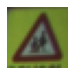

shape: (28, 28, 3), min: 0.06605392156862745, max: 0.607017807122849


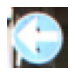

shape: (28, 28, 3), min: 0.08263305322128846, max: 0.996078431372549


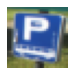

shape: (28, 28, 3), min: 0.12533888555422176, max: 0.9921568627450981


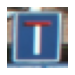

shape: (28, 28, 3), min: 0.08907563025210086, max: 0.9949579831932773


In [20]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images28[traffic_signs[i]].shape, 
                                                  images28[traffic_signs[i]].min(), 
                                                  images28[traffic_signs[i]].max()))
plt.show()

## Преобразование изображений в оттенки серого

См файл Test_image_filters

In [21]:
from skimage import data
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt

from skimage.color.adapt_rgb import adapt_rgb
from skimage import filters
from skimage.color import rgb2gray

In [22]:
def as_gray(image_filter, image, *args, **kwargs):
    gray_image = rgb2gray(image)
    return image_filter(gray_image, *args, **kwargs)

In [23]:
@adapt_rgb(as_gray)
def sobel_gray(image):
    return filters.sobel(image)

In [24]:
# Конвертация `images28` в массив
images28 = np.array(images28)

In [25]:
images28 = rescale_intensity(sobel_gray(images28))

In [26]:
images28 = rgb2gray(images28)

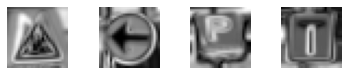

In [27]:
traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray") 
    plt.subplots_adjust(wspace=0.5)

plt.show()

# Моделирование нейронной сети

In [28]:
import tensorflow as tf

In [29]:
# Инициализация плейсхолдеров 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Сглаживание входных данных
images_flat = tf.contrib.layers.flatten(x)

# Полностью подключенный слой 
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# Определение функции потерь
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))

# Определение оптимизатора 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Конвертация логитов в индексы меток
correct_pred = tf.argmax(logits, 1)

# Определение метрики точности
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [30]:
print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten/flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax:0", shape=(?,), dtype=int64)


## Запуск нейронной сети

In [31]:
tf.set_random_seed(1234)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(201):
    print('EPOCH', i)
    _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images28, y: labels})
    if i % 10 == 0:
        print("Loss: ", loss)
        print('DONE WITH EPOCH')

EPOCH 0
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1
EPOCH 2
EPOCH 3
EPOCH 4
EPOCH 5
EPOCH 6
EPOCH 7
EPOCH 8
EPOCH 9
EPOCH 10
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 11
EPOCH 12
EPOCH 13
EPOCH 14
EPOCH 15
EPOCH 16
EPOCH 17
EPOCH 18
EPOCH 19
EPOCH 20
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 21
EPOCH 22
EPOCH 23
EPOCH 24
EPOCH 25
EPOCH 26
EPOCH 27
EPOCH 28
EPOCH 29
EPOCH 30
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 31
EPOCH 32
EPOCH 33
EPOCH 34
EPOCH 35
EPOCH 36
EPOCH 37
EPOCH 38
EPOCH 39
EPOCH 40
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 41
EPOCH 42
EPOCH 43
EPOCH 44
EPOCH 45
EPOCH 46
EPOCH 47
EPOCH 48
EPOCH 49
EPOCH 50
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 51
EPOCH 52
EPOCH 53
EPOCH 54
EPOCH 55
EPOCH 56
EPOCH 57
EPOCH 58
EPOCH 59
EPOCH 60
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 

In [32]:
# tf.set_random_seed(1234)

# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     for i in range(201):
#         _, loss_value = sess.run([train_op, loss], feed_dict={x: images28, y: labels})
#         if i % 10 == 0:
#             print("Loss: ", loss)

## Оценка нейронной сети

In [33]:
import random

In [34]:
# Выбор 10 случайных изображений

sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

In [35]:
# Запуск операции "correct_pred"
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]

# Вывод истинных и предсказанных меток
print(sample_labels) 
print(predicted)

[32, 54, 57, 54, 22, 47, 20, 57, 49, 61]
[32 22 38 38 22 47 32 56 47 61]


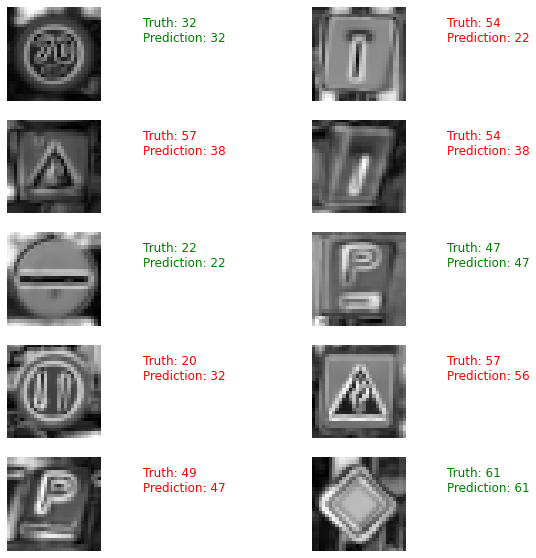

In [36]:
# Вывод предсказанных и истинных изображений

fig = plt.figure(figsize=(10, 10))

for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')  
    if truth == prediction:
        color='green'
    else:
        color = 'red'
    plt.text(40, 10, "Truth: {0}\nPrediction: {1}".format(truth, prediction), fontsize=12, color=color)
    plt.imshow(sample_images[i], cmap="gray")

plt.show()

In [37]:
# Загрузка данных проверки
test_images, test_labels = load_data(test_data_directory)

In [38]:
# Преобразование изображений в 28 х 28 пикселей
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

In [39]:
# Конвертация в оттенки серого
test_images28 = rescale_intensity(sobel_gray(np.array(test_images28)))
test_images28 = rgb2gray(np.array(test_images28))

In [40]:
# Вывод предсказаний и полного набора данных проверки
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

In [41]:
# Вычисление совпадений 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

In [42]:
# Вычисление точности
accuracy = match_count / len(test_labels)

# Вывод точности
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.532
